In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
charges_stat = df.describe()['charges']
charges_stat

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [11]:
df_encode = pd.get_dummies(df, drop_first=True)
df_encode

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [17]:
X = df_encode.drop('charges', axis=1)
y = df_encode['charges']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse, r2

(5911.704624216014, 0.7505566281331599)

In [24]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [25]:
coff = model.coef_
coeff_df = pd.DataFrame(coff, index=X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
age,262.209253
bmi,343.292880
children,467.379439
sex_male,-464.229487
smoker_yes,23661.216995
region_northwest,-499.503130
region_southeast,-1194.892437
region_southwest,-865.372739


In [26]:
coeff_df['abs_coeff'] = coeff_df['Coefficient'].abs()

In [27]:
coeff_df

,Coefficient,abs_coeff
age,262.209253,262.209253
bmi,343.292880,343.292880
children,467.379439,467.379439
sex_male,-464.229487,464.229487
smoker_yes,23661.216995,23661.216995
region_northwest,-499.503130,499.503130
region_southeast,-1194.892437,1194.892437
region_southwest,-865.372739,865.372739


In [28]:
coeff_df.sort_values('abs_coeff', ascending=False)

,Coefficient,abs_coeff
smoker_yes,23661.216995,23661.216995
region_southeast,-1194.892437,1194.892437
region_southwest,-865.372739,865.372739
region_northwest,-499.503130,499.503130
children,467.379439,467.379439
sex_male,-464.229487,464.229487
bmi,343.292880,343.292880
age,262.209253,262.209253


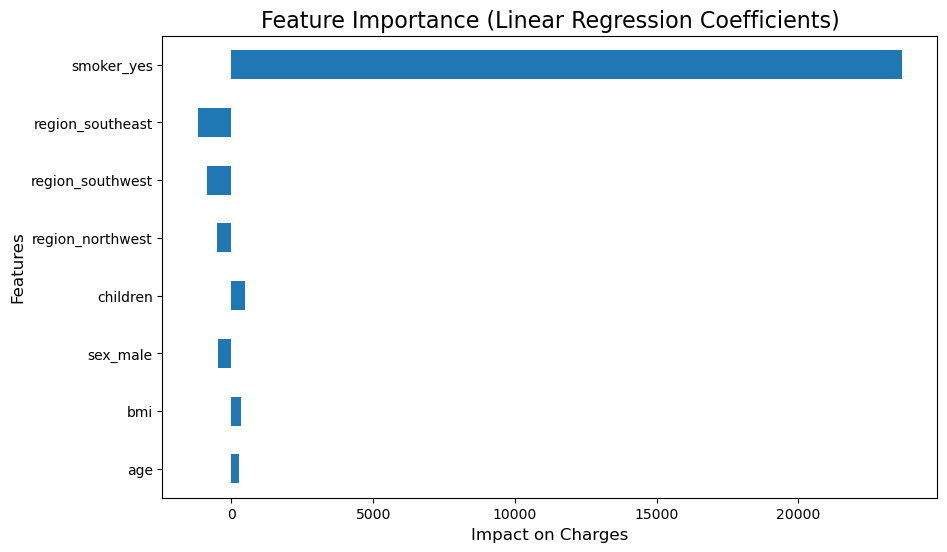

In [31]:
import matplotlib.pyplot as plt
coeff_df.sort_values(by='abs_coeff', ascending=True)['Coefficient'].plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance (Linear Regression Coefficients)', fontsize=16)
plt.xlabel('Impact on Charges', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()
